In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b59aabc9521d19db86bc2f8be057498a"
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b59aabc9521d19db86bc2f8be057498a


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
    # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
    # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
    # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
    # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                        "Lat": city_lat,
                        "Lng": city_lng,
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
    pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tessalit
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | saint george
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | kloulklubed
Processing Record 7 of Set 1 | ponta do sol
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | goderich
Processing Record 13 of Set 1 | zonguldak
Processing Record 14 of Set 1 | saskylakh
Processing Record 15 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 16 of Set 1 | pisco
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | marcona
City not found. Skipping...
Processing Record 19 of Set 1 | kalabo
Processing Record 20 of Set 1 | cherskiy
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of S

Processing Record 40 of Set 4 | mareeba
Processing Record 41 of Set 4 | makakilo city
Processing Record 42 of Set 4 | kavieng
Processing Record 43 of Set 4 | langfang
Processing Record 44 of Set 4 | saint-philippe
Processing Record 45 of Set 4 | xinqing
Processing Record 46 of Set 4 | atyrau
Processing Record 47 of Set 4 | bilma
Processing Record 48 of Set 4 | bambous virieux
Processing Record 49 of Set 4 | salalah
Processing Record 50 of Set 4 | barranca de upia
Processing Record 1 of Set 5 | andenes
Processing Record 2 of Set 5 | athabasca
Processing Record 3 of Set 5 | lichinga
Processing Record 4 of Set 5 | marfino
Processing Record 5 of Set 5 | sao filipe
Processing Record 6 of Set 5 | tautira
Processing Record 7 of Set 5 | nokaneng
Processing Record 8 of Set 5 | hithadhoo
Processing Record 9 of Set 5 | sayhat
Processing Record 10 of Set 5 | san quintin
Processing Record 11 of Set 5 | namtsy
Processing Record 12 of Set 5 | macapa
Processing Record 13 of Set 5 | chumikan
Processing

Processing Record 22 of Set 8 | bolshoye ignatovo
City not found. Skipping...
Processing Record 23 of Set 8 | aracatuba
Processing Record 24 of Set 8 | burnie
Processing Record 25 of Set 8 | malm
Processing Record 26 of Set 8 | aksha
Processing Record 27 of Set 8 | tijuana
Processing Record 28 of Set 8 | buta
Processing Record 29 of Set 8 | changuinola
Processing Record 30 of Set 8 | dicamay
Processing Record 31 of Set 8 | salinas
Processing Record 32 of Set 8 | hun
Processing Record 33 of Set 8 | nuuk
Processing Record 34 of Set 8 | riberalta
Processing Record 35 of Set 8 | palafrugell
Processing Record 36 of Set 8 | ancud
Processing Record 37 of Set 8 | cabra
Processing Record 38 of Set 8 | mazagao
Processing Record 39 of Set 8 | gao
Processing Record 40 of Set 8 | chipinge
Processing Record 41 of Set 8 | marsh harbour
Processing Record 42 of Set 8 | copiapo
Processing Record 43 of Set 8 | asansol
Processing Record 44 of Set 8 | inirida
Processing Record 45 of Set 8 | yanchukan
City 

Processing Record 8 of Set 12 | maroantsetra
Processing Record 9 of Set 12 | manado
Processing Record 10 of Set 12 | tianpeng
Processing Record 11 of Set 12 | chifeng
Processing Record 12 of Set 12 | shimoda
Processing Record 13 of Set 12 | fengzhen
Processing Record 14 of Set 12 | najran
Processing Record 15 of Set 12 | rabo de peixe
Processing Record 16 of Set 12 | aitape
Processing Record 17 of Set 12 | wanaka
Processing Record 18 of Set 12 | cascais
Processing Record 19 of Set 12 | uusikaupunki
Processing Record 20 of Set 12 | inderborskiy
City not found. Skipping...
Processing Record 21 of Set 12 | bolitoc
Processing Record 22 of Set 12 | blackfoot
Processing Record 23 of Set 12 | vaitape
Processing Record 24 of Set 12 | ridgecrest
Processing Record 25 of Set 12 | pangoa
Processing Record 26 of Set 12 | bisira
Processing Record 27 of Set 12 | beringovskiy
Processing Record 28 of Set 12 | primalkinskoye
Processing Record 29 of Set 12 | qaqortoq
Processing Record 30 of Set 12 | shah

In [10]:
len(city_data)

553

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tessalit,20.1986,1.0114,101.01,6,11,9.24,ML,2021-10-10 13:47:46
1,Avarua,-21.2078,-159.7750,68.05,88,98,3.44,CK,2021-10-10 13:47:46
2,Atuona,-9.8000,-139.0333,77.94,72,1,18.12,PF,2021-10-10 13:47:46
3,Saint George,37.1041,-113.5841,52.39,65,1,1.99,US,2021-10-10 13:45:17
4,Hermanus,-34.4187,19.2345,80.80,45,98,5.91,ZA,2021-10-10 13:47:47
5,Kloulklubed,7.0419,134.2556,79.30,74,100,12.19,PW,2021-10-10 13:47:47
6,Ponta Do Sol,32.6667,-17.1000,77.72,69,0,2.55,PT,2021-10-10 13:47:48
7,Ushuaia,-54.8000,-68.3000,47.82,49,0,4.61,AR,2021-10-10 13:45:21
8,Port Elizabeth,-33.9180,25.5701,73.09,55,0,17.27,ZA,2021-10-10 13:45:01
9,Vaini,-21.2000,-175.2000,69.96,100,75,3.44,TO,2021-10-10 13:44:02


In [12]:
new_column_order = ["City", "Country", "Date", "Lat","Lng","Max Temp","Humidity","Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tessalit,ML,2021-10-10 13:47:46,20.1986,1.0114,101.01,6,11,9.24
1,Avarua,CK,2021-10-10 13:47:46,-21.2078,-159.7750,68.05,88,98,3.44
2,Atuona,PF,2021-10-10 13:47:46,-9.8000,-139.0333,77.94,72,1,18.12
3,Saint George,US,2021-10-10 13:45:17,37.1041,-113.5841,52.39,65,1,1.99
4,Hermanus,ZA,2021-10-10 13:47:47,-34.4187,19.2345,80.80,45,98,5.91
5,Kloulklubed,PW,2021-10-10 13:47:47,7.0419,134.2556,79.30,74,100,12.19
6,Ponta Do Sol,PT,2021-10-10 13:47:48,32.6667,-17.1000,77.72,69,0,2.55
7,Ushuaia,AR,2021-10-10 13:45:21,-54.8000,-68.3000,47.82,49,0,4.61
8,Port Elizabeth,ZA,2021-10-10 13:45:01,-33.9180,25.5701,73.09,55,0,17.27
9,Vaini,TO,2021-10-10 13:44:02,-21.2000,-175.2000,69.96,100,75,3.44


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

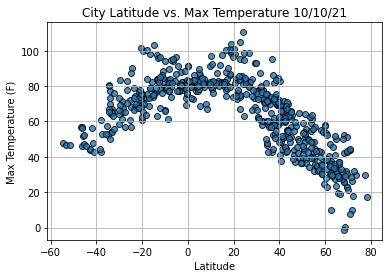

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

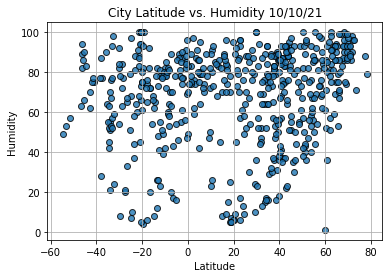

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

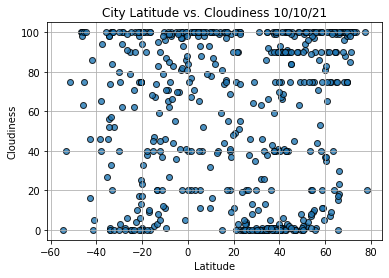

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

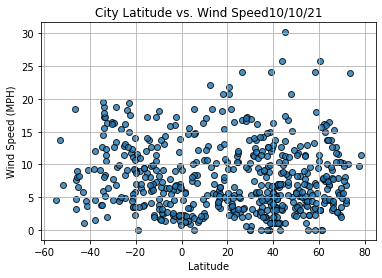

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed"+ time.strftime("%x"))
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()